# ⛏️ **Dataset Mining**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. [Link Maintainance Kaggle](https://www.kaggle.com/datasets/chavindudulaj/vehicle-maintenance-data?utm_source=chatgpt.com)
2. [Link Engine Health Kaggle](https://www.kaggle.com/datasets/parvmodi/automotive-vehicles-engine-health-dataset?utm_source=chatgpt.com)
3. [Link Huyndai](https://data.mendeley.com/datasets/zm45zhp8z5/1?utm_source=chatgpt.com)
4. [Link Scania X](https://arxiv.org/abs/2401.15199?utm_source=chatgpt.com)

In [ ]:
!pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!mkdir -p /content/drive/My\ Drive/EAT40005/

# 1. Loading Vehicle Maintenance Data:
!kaggle datasets download -d chavindudulaj/vehicle-maintenance-data -p "/content/drive/My Drive/EAT40005/"
print("Vehicle Maintenance Data downloaded")

# 2. Loading Automotive Vehicles Engine Health Dataset:
!kaggle datasets download -d parvmodi/automotive-vehicles-engine-health-dataset -p "/content/drive/My Drive/EAT40005/"
print("Automotive Vehicles Engine Health Dataset downloaded")


Dataset URL: https://www.kaggle.com/datasets/chavindudulaj/vehicle-maintenance-data
License(s): MIT
Vehicle Maintenance Data downloaded
Dataset URL: https://www.kaggle.com/datasets/parvmodi/automotive-vehicles-engine-health-dataset
License(s): CC0-1.0
Automotive Vehicles Engine Health Dataset downloaded


In [ ]:
import requests
import os
dest_dir = '/content/drive/My Drive/EAT40005/'
os.makedirs(dest_dir, exist_ok=True)

# 3. Loading Hyundai Cars Maintenance Dataset:
# Loading from URL

# 4. Loading SCANIA Component X Dataset:
url = 'https://api.researchdata.se/dataset/2024-34/2/file/zip'
zip_path = os.path.join(dest_dir, 'scania_component_x_dataset.zip')
response = requests.get(url, stream=True)
with open(zip_path, 'wb') as file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            file.write(chunk)
print("SCANIA Component X Dataset downloaded")


SCANIA Component X Dataset downloaded


**Inspect**

In [ ]:
import os

# Define the target directory
dest_dir = '/content/drive/My Drive/EAT40005/'

# List of downloaded files
files = [
    'vehicle-maintenance-data.zip',
    'automotive-vehicles-engine-health-dataset.zip',
    'cars_hyundai.csv',
    'scania_component_x_dataset.zip'
]

# Inspect file sizes
for file_name in files:
    file_path = os.path.join(dest_dir, file_name)
    if os.path.exists(file_path):
        size_mb = os.path.getsize(file_path) / (1024 * 1024)  # Convert bytes to MB
        print(f"{file_name}: {size_mb:.2f} MB")
    else:
        print(f"{file_name} not found.")

vehicle-maintenance-data.zip not found.
automotive-vehicles-engine-health-dataset.zip not found.
cars_hyundai.csv: 0.08 MB
scania_component_x_dataset.zip: 1576.32 MB


#**Model Evaluation Insights: Predictive Maintenance on Vehicle Maintainance**
---

## 📊 **Performance Summary**

| Model               | Accuracy | ROC AUC | F1 Score (Class 1) | Comment |
|---------------------|----------|---------|--------------------|---------|
| **XGBoost**         | 1.000    | 1.000   | 1.00               | ✅ *Perfect score on all metrics* |
| **Random Forest**   | 0.998    | 0.995   | 1.00               | ✅ *Nearly perfect; very high generalization* |
| **Logistic Regression** | 0.921 | 0.862   | 0.95               | ⚠️ *Acceptable baseline, but underperforms compared to tree-based models* |

---
## ✅ **Recommendation**

| Recommendation | Justification |
|----------------|---------------|
| ✅ **Use XGBoost as your production model** | Best overall performance, scalable, interpretable (via SHAP) |
| ✅ **Keep Random Forest as a fallback** | Simpler, fast to train, useful for validation |
| ⚠️ Use Logistic Regression for benchmarking only | Useful as a baseline, but not for deployment |
| ⚠️ Tune Logistic Regression (optional) | Scale features, increase `max_iter`, or try different solvers (`liblinear`, `saga`) |
| ✅ **Save trained models** | You’ve already saved them — great for deployment & reproducibility |
| ✅ Visualize SHAP values (optional) | For explainability to stakeholders or clients |


**1. Observe Data**



In [ ]:
import zipfile
import os
import pandas as pd

# Extract ZIP
# with zipfile.ZipFile('/content/drive/My Drive/EAT40005/vehicle-maintenance-data.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/My Drive/EAT40005/vehicle-maintenance-data/')

# Load CSV
df = pd.read_csv('/content/drive/My Drive/EAT40005/vehicle-maintenance-data/vehicle_maintenance_data.csv')
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


**2. EDA Processings**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

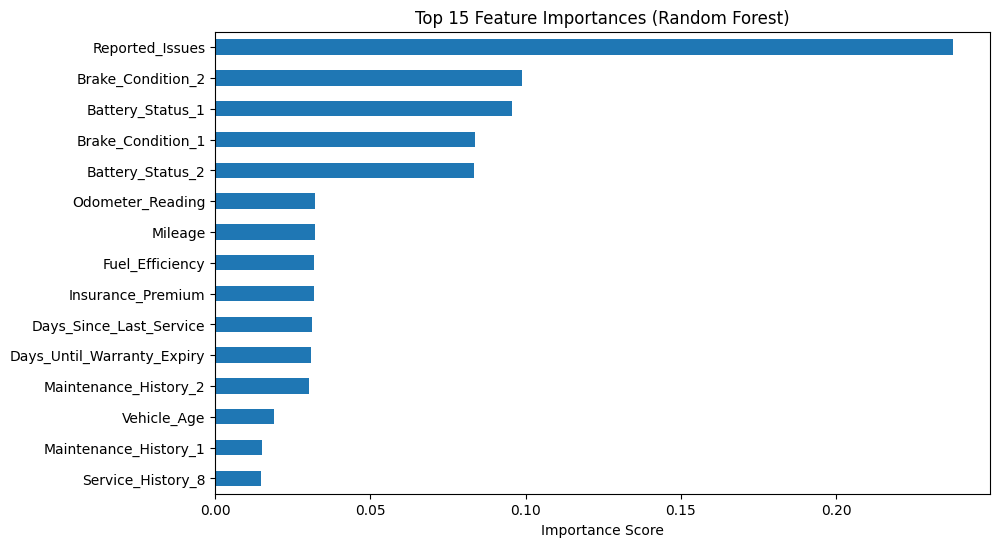

In [ ]:
# --- Step 1: Initial Data Checks ---
df.info()
df.describe()
print(df.isnull().sum())


# --- Step 2: Encode / Map Categorical Features ---
df['Vehicle_Model'] = df['Vehicle_Model'].map({'Truck': 0, 'Van': 1, 'Bus': 2})
df['Maintenance_History'] = df['Maintenance_History'].map({'Poor': 0, 'Average': 1, 'Good': 2})
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Electric': 1})
df['Transmission_Type'] = df['Transmission_Type'].map({'Manual': 0, 'Automatic': 1})
df['Owner_Type'] = df['Owner_Type'].map({'First': 0, 'Second': 1, 'Third': 2})
df['Tire_Condition'] = df['Tire_Condition'].map({'Worn Out': 0, 'Good': 1, 'New': 2})
df['Brake_Condition'] = df['Brake_Condition'].map({'Worn Out': 0, 'Good': 1, 'New': 2})
df['Battery_Status'] = df['Battery_Status'].map({'Weak': 0, 'Good': 1, 'New': 2})


# --- Step 3: Convert Dates & Create Features ---
df['Last_Service_Date'] = pd.to_datetime(df['Last_Service_Date'])
df['Warranty_Expiry_Date'] = pd.to_datetime(df['Warranty_Expiry_Date'])
# Convert date to datetime format
df['Days_Since_Last_Service'] = (pd.to_datetime('today') - df['Last_Service_Date']).dt.days
df['Days_Until_Warranty_Expiry'] = (df['Warranty_Expiry_Date'] - pd.to_datetime('today')).dt.days


# --- Step 4: One-Hot Encoding for Categorical Variables ---
categorical_cols = ['Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type',
                    'Owner_Type', 'Service_History', 'Accident_History',
                    'Tire_Condition', 'Brake_Condition', 'Battery_Status']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Drop original datetime columns
df_encoded = df_encoded.drop(['Last_Service_Date', 'Warranty_Expiry_Date'], axis=1)


# --- Step 5: Train/Test Split ---
from sklearn.model_selection import train_test_split
X = df_encoded.drop('Need_Maintenance', axis=1)
y = df_encoded['Need_Maintenance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- Step 6: Feature Analysis Methods ---
# 1. Point Biserial Correlation
from scipy.stats import pointbiserialr
print("\n--- Point Biserial Correlation with Need_Maintenance ---")
for col in X.select_dtypes(include='number').columns:
    corr, _ = pointbiserialr(X[col], y)
    print(f"{col:35}: {corr:.2f}")

# 2. Chi-Square Test (for categorical relevance)
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_chi = MinMaxScaler().fit_transform(X)  # Chi2 requires non-negative features
chi_scores, p_vals = chi2(X_chi, y)
print("\n--- Chi-Square Feature Scores ---")
for feature, score in zip(X.columns, chi_scores):
    print(f"{feature:35}: {score:.2f}")

# 3. Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)
print("\n--- Top 15 Features (Random Forest Importance) ---")
print(top_features)

# 4. Visualize
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

**3. Model Training and Evaluation**

RandomForest starting
RandomForest completed
XGBoost starting


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost completed
Logistic Regression starting


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression completed
Isolation completed
✅ Models saved to /content/drive/My Drive/EAT40005/models_vehicle_maintenance

🔍 Evaluation for Random Forest
Accuracy: 0.998
ROC AUC: 0.9949773215718758
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1915
           1       1.00      1.00      1.00      8085

    accuracy                           1.00     10000
   macro avg       1.00      0.99      1.00     10000
weighted avg       1.00      1.00      1.00     10000



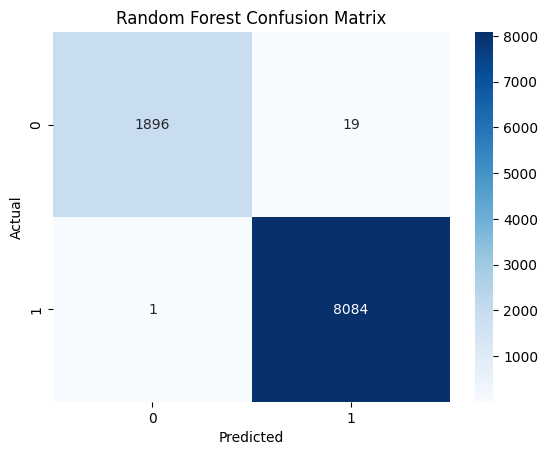


🔍 Evaluation for XGBoost
Accuracy: 1.0
ROC AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1915
           1       1.00      1.00      1.00      8085

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



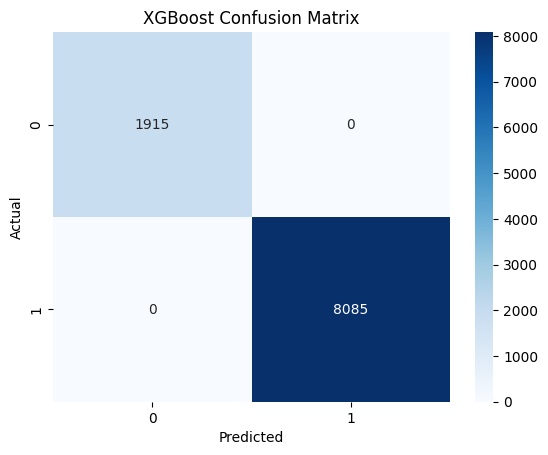


🔍 Evaluation for Logistic Regression
Accuracy: 0.9211
ROC AUC: 0.8617410315657238
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1915
           1       0.95      0.96      0.95      8085

    accuracy                           0.92     10000
   macro avg       0.88      0.86      0.87     10000
weighted avg       0.92      0.92      0.92     10000



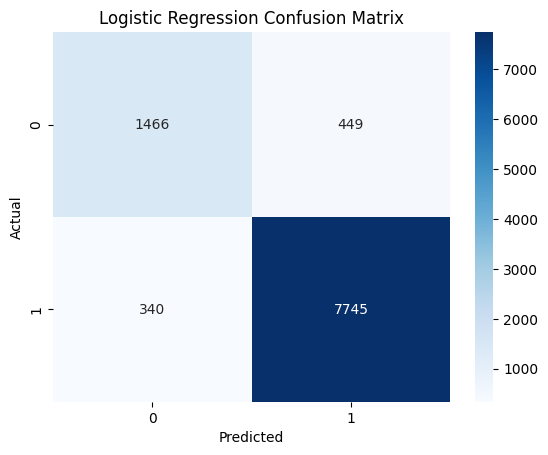

In [ ]:
# --- Step 7: Train Predictive Models (Classification + Optional Anomaly) ---
# 1. Random Forest Classifier
print("RandomForest starting")
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("RandomForest completed")

# 2. XGBoost Classifier
print("XGBoost starting")
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("XGBoost completed")

# 3. Logistic Regression
print("Logistic Regression starting")
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression completed")

# 4. Optional: Anomaly Detection Models (only for flagging “risky” profiles, not direct classification)
# 4.1. Isolation Forest
from sklearn.ensemble import IsolationForest
iso_model = IsolationForest(contamination=0.1, random_state=42)
iso_model.fit(X_train)
iso_scores = iso_model.predict(X_test)  # -1 = anomaly, 1 = normal
print("Isolation completed")
# 4.2. One-Class SVM (removed)
# from sklearn.svm import OneClassSVM
# svm_model = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.01)
# svm_model.fit(X_train)
# svm_preds = svm_model.predict(X_test)  # -1 = anomaly
# print("SVM completed")
# Do NOT use autoencoders or deep models here. There is no temporal component, and the dataset is not high-dimensional enough to justify deep learning.


# 5. Model saving
import os
import joblib
# Create directory if it doesn't exist
model_dir = '/content/drive/My Drive/EAT40005/models_vehicle_maintenance'
os.makedirs(model_dir, exist_ok=True)
# Save the trained models
joblib.dump(rf_model, os.path.join(model_dir, 'random_forest_model.pkl'))
joblib.dump(xgb_model, os.path.join(model_dir, 'xgboost_model.pkl'))
joblib.dump(lr_model, os.path.join(model_dir, 'logistic_regression_model.pkl'))
joblib.dump(iso_model, os.path.join(model_dir, 'isolation_forest_model.pkl'))
# joblib.dump(svm_model, os.path.join(model_dir, 'one_class_svm_model.pkl'))
print(f"✅ Models saved to {model_dir}")


# --- Step 8: Evaluate Models (Supervised Only) ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluate on feature name
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 Evaluation for {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    # Configure confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
# Evaluate All
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)

# **Model Evaluation Insights: Predictive Maintenance on Automotive Vehicles Engine Health**
---

## 📊 **Performance Summary**

| Model                   | Accuracy | ROC AUC | F1 Score (Class 1) | Comment |
|-------------------------|----------|---------|--------------------|---------|
| **XGBoost**             | 0.640    | 0.589   | 0.73               | ⚠️ *Slightly better than other models but still modest performance* |
| **Random Forest**       | 0.635    | 0.582   | 0.73               | ⚠️ *Very close to XGBoost, with low class-0 recall* |
| **Logistic Regression** | 0.650    | 0.575   | 0.76               | ⚠️ *Best accuracy, but recall on class 0 (failures) is poor* |

---

## ✅ **Recommendation**

| Recommendation | Justification |
|----------------|---------------|
| ⚠️ **Use XGBoost for further tuning** | Slight edge over other models; can benefit from hyperparameter tuning or SMOTE |
| ⚠️ Keep Random Forest for comparison | Simpler and equally performant; may serve as a robust baseline |
| ⚠️ Use Logistic Regression only as reference | Despite best accuracy, poor performance on critical class (engine issues) |
| ✅ Consider feature engineering or collection improvements | Add more high-resolution signals (e.g., vibration, torque, or historical faults) |
| ✅ Try SMOTE or class weighting | To improve detection of under-represented class (class 0) |
| ✅ Apply threshold tuning (ROC/PR curve) | May shift decision boundary to improve balance between precision and recall |
| ⚠️ Avoid deploying without better class 0 performance | High false negatives may miss engine failure risk |

**1. Observe Data**

In [ ]:
import zipfile
import os
import pandas as pd

# Extract ZIP
# with zipfile.ZipFile('/content/drive/My Drive/EAT40005/automotive-vehicles-engine-health-dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/My Drive/EAT40005/automotive-vehicles-engine-health-dataset/')

# Load CSV
df = pd.read_csv('/content/drive/My Drive/EAT40005/automotive-vehicles-engine-health-dataset/engine_data.csv')
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


**2. EDA Processings**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

--- Point Biserial Correlation with Engine_Condition ---
Engine_RPM                    : -0.27
Lub_Oil_Pressure              : 0.06
Fuel_Pressure                 : 0.12
Coolant_Pressure              : -0.02
Lub_Oil_Temp                  : -0.09
Coolan

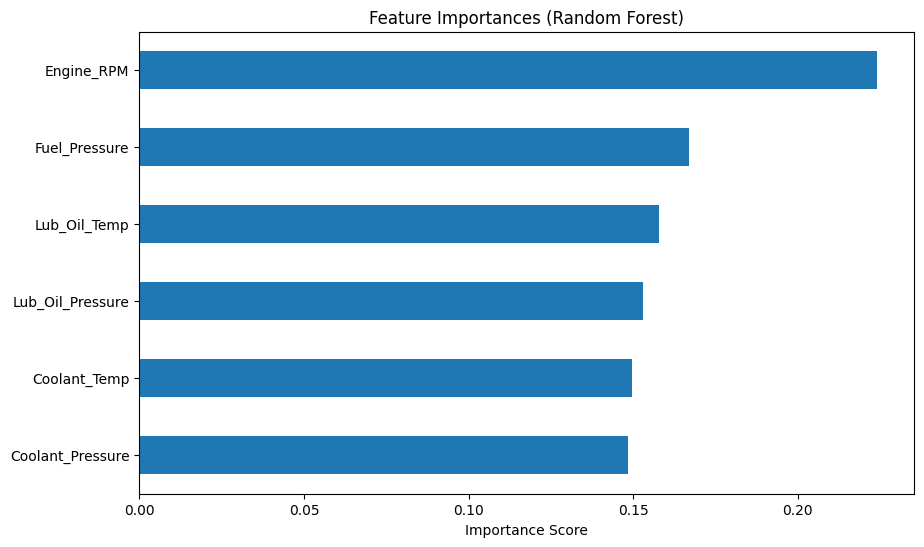

In [ ]:
### --- Step 1: Initial Data Checks ---
# Initial inspection
df.info()
df.describe()
print(df.isnull().sum())


### --- Step 2 & 3: Skip data cleaning and processing since cleaned already ---


### --- Step 4: Prepare Feature and Target Variables ---
# Rename for clarity if needed
df = df.rename(columns={
    'Engine rpm': 'Engine_RPM',
    'Lub oil pressure': 'Lub_Oil_Pressure',
    'Fuel pressure': 'Fuel_Pressure',
    'Coolant pressure': 'Coolant_Pressure',
    'lub oil temp': 'Lub_Oil_Temp',
    'Coolant temp': 'Coolant_Temp',
    'Engine Condition': 'Engine_Condition'  # Binary target: 0 = bad, 1 = good (or vice versa)
})
# Feature matrix and target
X = df.drop('Engine_Condition', axis=1)
y = df['Engine_Condition']
# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### --- Step 5: Feature Analysis ---
# 1. Point Biserial Correlation
from scipy.stats import pointbiserialr
print("\n--- Point Biserial Correlation with Engine_Condition ---")
for col in X.columns:
    corr, _ = pointbiserialr(X[col], y)
    print(f"{col:30}: {corr:.2f}")

# 2. Chi-Square Test (all values should be non-negative)
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
X_scaled = MinMaxScaler().fit_transform(X)
chi_scores, p_vals = chi2(X_scaled, y)
print("\n--- Chi-Square Feature Scores ---")
for feature, score in zip(X.columns, chi_scores):
    print(f"{feature:30}: {score:.2f}")

# 3. Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False)
print("\n--- Top Feature Importances (Random Forest) ---")
print(top_features)

# 4. Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


**3. Model Training and Evaluation**

RandomForest starting
RandomForest completed
XGBoost starting


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost completed
Logistic Regression starting
Logistic Regression completed
Isolation completed
SVM completed
✅ Models saved to /content/drive/My Drive/EAT40005/models_automotive-vehicles-engine-health

🔍 Evaluation for Random Forest
Accuracy: 0.6347581264397236
ROC AUC: 0.5822692539432954
              precision    recall  f1-score   support

           0       0.52      0.37      0.43      1459
           1       0.68      0.79      0.73      2448

    accuracy                           0.63      3907
   macro avg       0.60      0.58      0.58      3907
weighted avg       0.62      0.63      0.62      3907



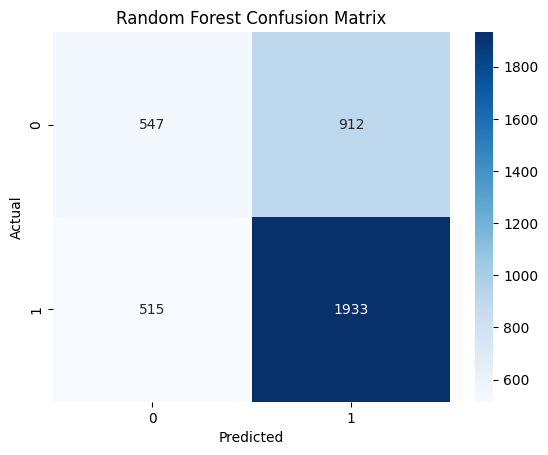


🔍 Evaluation for XGBoost
Accuracy: 0.6403890453033018
ROC AUC: 0.5885625954745617
              precision    recall  f1-score   support

           0       0.53      0.38      0.44      1459
           1       0.68      0.79      0.73      2448

    accuracy                           0.64      3907
   macro avg       0.60      0.59      0.59      3907
weighted avg       0.62      0.64      0.63      3907



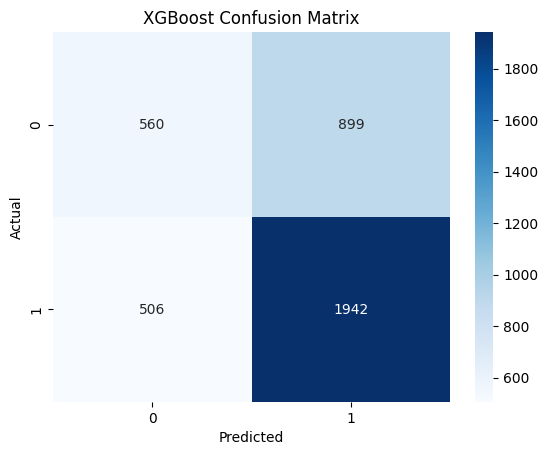


🔍 Evaluation for Logistic Regression
Accuracy: 0.6503711287432813
ROC AUC: 0.5752066562288611
              precision    recall  f1-score   support

           0       0.56      0.28      0.37      1459
           1       0.67      0.87      0.76      2448

    accuracy                           0.65      3907
   macro avg       0.62      0.58      0.57      3907
weighted avg       0.63      0.65      0.61      3907



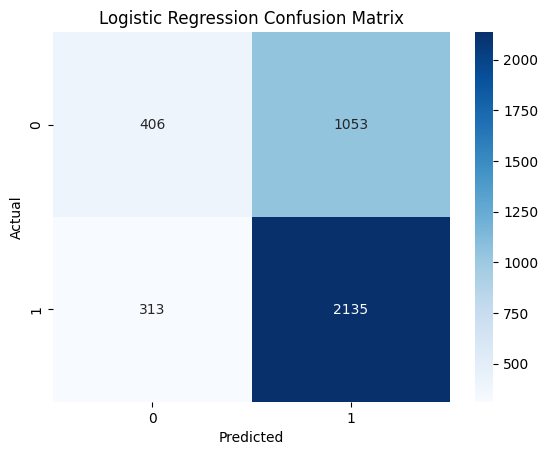

In [ ]:
# --- Step 7: Train Predictive Models (Classification + Optional Anomaly) ---
# 1. Random Forest Classifier
print("RandomForest starting")
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("RandomForest completed")

# 2. XGBoost Classifier
print("XGBoost starting")
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("XGBoost completed")

# 3. Logistic Regression
print("Logistic Regression starting")
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression completed")

# 4. Optional: Anomaly Detection Models (only for flagging “risky” profiles, not direct classification)
# 4.1. Isolation Forest
from sklearn.ensemble import IsolationForest
iso_model = IsolationForest(contamination=0.1, random_state=42)
iso_model.fit(X_train)
iso_scores = iso_model.predict(X_test)  # -1 = anomaly, 1 = normal
print("Isolation completed")
# 4.2. One-Class SVM (removed)
from sklearn.svm import OneClassSVM
svm_model = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.01)
svm_model.fit(X_train)
svm_preds = svm_model.predict(X_test)  # -1 = anomaly
print("SVM completed")
# Do NOT use autoencoders or deep models here. There is no temporal component, and the dataset is not high-dimensional enough to justify deep learning.


# 5. Model saving
import os
import joblib
# Create directory if it doesn't exist
model_dir = '/content/drive/My Drive/EAT40005/models_automotive_vehicles_engine_health'
os.makedirs(model_dir, exist_ok=True)
# Save the trained models
joblib.dump(rf_model, os.path.join(model_dir, 'random_forest_model.pkl'))
joblib.dump(xgb_model, os.path.join(model_dir, 'xgboost_model.pkl'))
joblib.dump(lr_model, os.path.join(model_dir, 'logistic_regression_model.pkl'))
joblib.dump(iso_model, os.path.join(model_dir, 'isolation_forest_model.pkl'))
joblib.dump(svm_model, os.path.join(model_dir, 'one_class_svm_model.pkl'))
print(f"✅ Models saved to {model_dir}")


# --- Step 8: Evaluate Models (Supervised Only) ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluate on feature name
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 Evaluation for {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    # Configure confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
# Evaluate All
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)

# **Model Evaluation Insights: Predictive Maintenance on Hyundai Cars**

---

## 📊 **Performance Summary**

| Model                   | Accuracy | ROC AUC | F1 Score (Class 1) | Comment |
|-------------------------|----------|---------|--------------------|---------|
| **XGBoost**             | 0.568    | 0.567   | 0.54               | ⚠️ *Best performing model, but still modest results overall* |
| **Random Forest**       | 0.555    | 0.553   | 0.52               | ⚠️ *Performs slightly worse than XGBoost; better than logistic regression* |
| **Logistic Regression** | 0.482    | 0.486   | 0.50               | ❌ *Below average performance; not recommended for this dataset* |

---

## ✅ **Model Recommendations**

| Recommendation                                | Justification |
|-----------------------------------------------|---------------|
| ✅ **Use XGBoost for baseline prediction**     | Slightly outperforms others in accuracy, F1, and AUC |
| ⚠️ Consider tuning Random Forest further       | May improve with hyperparameter tuning (e.g., max_depth, min_samples_split) |
| ❌ Avoid Logistic Regression                   | Performance below 50%; lacks fit for this feature space |
| ⚠️ Apply feature engineering or aggregation    | Try combining or transforming `Temperature`, `Tire Pressure`, and `Brake Thickness` |
| ✅ Save trained models for iteration/testing   | Already done — useful for comparison and versioning |
| ✅ Optional: Use anomaly detection models      | Isolation Forest or One-Class SVM might uncover patterns missed by classifiers |

**1. Observe Data**

In [ ]:
import zipfile
import os
import pandas as pd

# Load CSV
df = pd.read_csv('/content/drive/My Drive/EAT40005/cars_hyundai.csv')
df.head()

,Engine Temperature (°C),Brake Pad Thickness (mm),Tire Pressure (PSI),Maintenance Type,Anomaly Indication
0,81.022390,7.984018,35.964546,Repair,0
1,98.076029,10.718692,32.143593,Routine Maintenance,1
2,81.205967,10.983070,31.058628,Routine Maintenance,1
3,86.081294,7.045311,28.539264,Repair,0
4,93.496568,9.948991,33.599560,Component Replacement,1


**2. EDA Processings**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Engine Temperature (°C)   1100 non-null   float64
 1   Brake Pad Thickness (mm)  1100 non-null   float64
 2   Tire Pressure (PSI)       1100 non-null   float64
 3   Maintenance Type          1100 non-null   object 
 4   Anomaly Indication        1100 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 43.1+ KB
Engine Temperature (°C)     0
Brake Pad Thickness (mm)    0
Tire Pressure (PSI)         0
Maintenance Type            0
Anomaly Indication          0
dtype: int64

--- Point Biserial Correlation with Anomaly Indication ---
Engine Temperature (°C)       : 0.05
Brake Pad Thickness (mm)      : -0.04
Tire Pressure (PSI)           : -0.02
Maintenance Type              : 0.01

--- Chi-Square Scores ---
Engine Temperature (°C)       : 0.43
Brake Pad

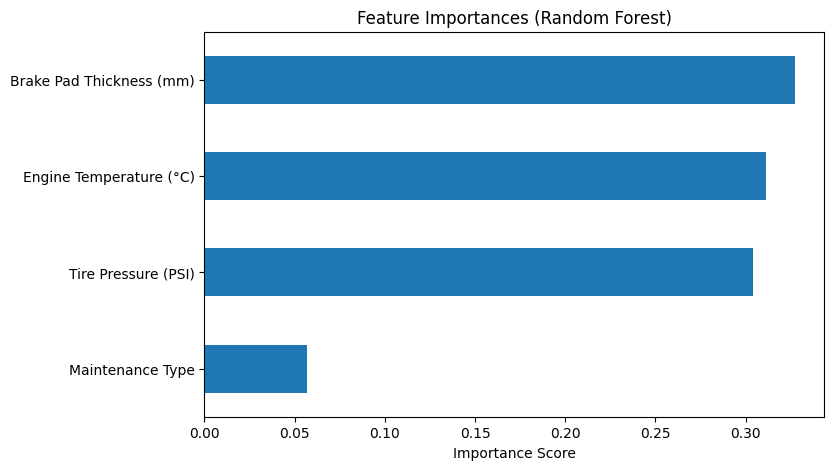

In [ ]:
# --- Step 1: Initial Data Checks ---
# Initial inspection
df.info()
df.describe()
print(df.isnull().sum())


# --- Step 2: Encode/Mapping Categorical Feature ('Maintenance Type') ---
df['Maintenance Type'] = df['Maintenance Type'].map({
    'Repair': 0,
    'Routine Maintenance': 1,
    'Component Replacement': 2
})


# --- Step 3: Skip Cleaning ---


# --- Step 4: Prepare Data ---
X = df.drop('Anomaly Indication', axis=1)
y = df['Anomaly Indication']
# Optional: Normalize (for certain models like logistic regression, SVM)
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)


# --- Step 5: Train/Test Split ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# --- Step 6: Feature Analysis ---
## 6.1. Point Biserial Correlation
from scipy.stats import pointbiserialr
print("\n--- Point Biserial Correlation with Anomaly Indication ---")
for col in X.columns:
    corr, _ = pointbiserialr(df[col], y)
    print(f"{col:30}: {corr:.2f}")

## 6.2. Chi-Square Test (only for categorical data)
from sklearn.feature_selection import chi2
chi_scores, _ = chi2(X_scaled, y)
print("\n--- Chi-Square Scores ---")
for feature, score in zip(X.columns, chi_scores):
    print(f"{feature:30}: {score:.2f}")

## 6.3. Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
# Run RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Present the key important features
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False)
print("\n--- Feature Importances ---")
print(top_features)

## 6.4. Plot
plt.figure(figsize=(8, 5))
top_features.plot(kind='barh')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


**3. Model Training and Evaluation**

RandomForest starting
RandomForest completed
XGBoost starting
XGBoost completed
Logistic Regression starting
Logistic Regression completed


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:34:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Isolation completed
SVM completed
✅ Models saved to /content/drive/My Drive/EAT40005/models_cars_hyundai

🔍 Evaluation for Random Forest
Accuracy: 0.5545454545454546
ROC AUC: 0.5527188328912467
              precision    recall  f1-score   support

           0       0.58      0.59      0.58       116
           1       0.53      0.52      0.52       104

    accuracy                           0.55       220
   macro avg       0.55      0.55      0.55       220
weighted avg       0.55      0.55      0.55       220



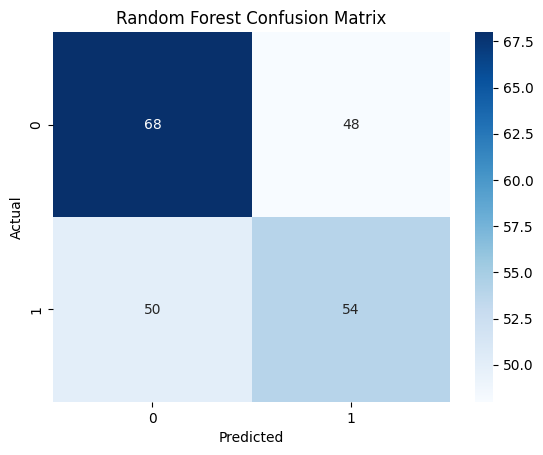


🔍 Evaluation for XGBoost
Accuracy: 0.5681818181818182
ROC AUC: 0.5666445623342174
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       116
           1       0.54      0.54      0.54       104

    accuracy                           0.57       220
   macro avg       0.57      0.57      0.57       220
weighted avg       0.57      0.57      0.57       220



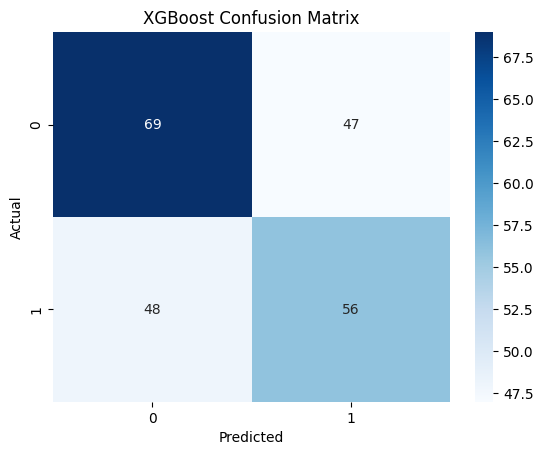


🔍 Evaluation for Logistic Regression
Accuracy: 0.4818181818181818
ROC AUC: 0.48574270557029187
              precision    recall  f1-score   support

           0       0.51      0.41      0.46       116
           1       0.46      0.56      0.50       104

    accuracy                           0.48       220
   macro avg       0.49      0.49      0.48       220
weighted avg       0.49      0.48      0.48       220



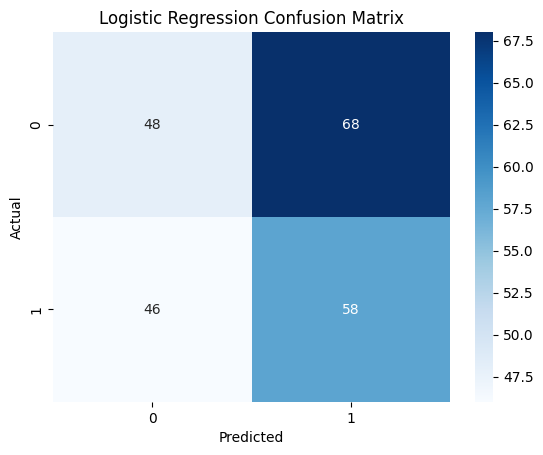

In [ ]:
# --- Step 7: Train Predictive Models (Classification + Optional Anomaly) ---
# 1. Random Forest Classifier
print("RandomForest starting")
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("RandomForest completed")

# 2. XGBoost Classifier
print("XGBoost starting")
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("XGBoost completed")

# 3. Logistic Regression
print("Logistic Regression starting")
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression completed")

# 4. Optional: Anomaly Detection Models (only for flagging “risky” profiles, not direct classification)
# 4.1. Isolation Forest
from sklearn.ensemble import IsolationForest
iso_model = IsolationForest(contamination=0.1, random_state=42)
iso_model.fit(X_train)
iso_scores = iso_model.predict(X_test)  # -1 = anomaly, 1 = normal
print("Isolation completed")
# 4.2. One-Class SVM (removed)
from sklearn.svm import OneClassSVM
svm_model = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.01)
svm_model.fit(X_train)
svm_preds = svm_model.predict(X_test)  # -1 = anomaly
print("SVM completed")
# Do NOT use autoencoders or deep models here. There is no temporal component, and the dataset is not high-dimensional enough to justify deep learning.


# 5. Model saving
import os
import joblib
# Create directory if it doesn't exist
model_dir = '/content/drive/My Drive/EAT40005/models_cars_hyundai'
os.makedirs(model_dir, exist_ok=True)
# Save the trained models
joblib.dump(rf_model, os.path.join(model_dir, 'random_forest_model.pkl'))
joblib.dump(xgb_model, os.path.join(model_dir, 'xgboost_model.pkl'))
joblib.dump(lr_model, os.path.join(model_dir, 'logistic_regression_model.pkl'))
joblib.dump(iso_model, os.path.join(model_dir, 'isolation_forest_model.pkl'))
joblib.dump(svm_model, os.path.join(model_dir, 'one_class_svm_model.pkl'))
print(f"✅ Models saved to {model_dir}")


# --- Step 8: Evaluate Models (Supervised Only) ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluate on feature name
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 Evaluation for {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    # Configure confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
# Evaluate All
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)

# **Model Evaluation Insights: Predictive Maintenance on Scania Component X Dataset**

**1. Observe Data**

In [ ]:
import zipfile
import os
import pandas as pd

# Extract ZIP
# with zipfile.ZipFile('/content/drive/My Drive/EAT40005/scania_component_x_dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/My Drive/EAT40005/scania_component_x_dataset/')

# Load CSV
file_path = '/content/drive/My Drive/EAT40005/scania_component_x_dataset/2024-34-2/data'
# Load core files
df_readout = pd.read_csv(os.path.join(file_path, "train_operational_readouts.csv"))
df_spec = pd.read_csv(os.path.join(file_path, "train_specifications.csv"))
df_tte = pd.read_csv(os.path.join(file_path, "train_tte.csv"))  # or train_labels.csv for classification
# Merge on common identifier (vehicle_id)
df = df_readout.merge(df_spec, on='vehicle_id')
df = df.merge(df_tte, on='vehicle_id')

# Initial Checks
print(df.info())
print(df.describe())
print(df.isnull().sum().sort_values(ascending=False).head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122452 entries, 0 to 1122451
Columns: 117 entries, vehicle_id to in_study_repair
dtypes: float64(107), int64(2), object(8)
memory usage: 1001.9+ MB
None
         vehicle_id     time_step         171_0         666_0         427_0  \
count  1.122452e+06  1.122452e+06  1.122452e+06  1.122412e+06  1.116047e+06   
mean   1.563501e+04  1.426336e+02  3.432285e+06  1.220519e+05  1.297269e+08   
std    9.802149e+03  9.529169e+01  2.766660e+06  1.441444e+05  1.005308e+08   
min    0.000000e+00  0.000000e+00  1.500000e+01  0.000000e+00  6.050000e+02   
25%    6.726000e+03  6.640000e+01  1.288320e+06  2.970375e+04  5.180904e+07   
50%    1.578300e+04  1.278000e+02  2.781472e+06  7.645500e+04  1.080906e+08   
75%    2.354200e+04  2.060000e+02  4.949614e+06  1.620980e+05  1.853690e+08   
max    3.364300e+04  5.074000e+02  3.048960e+07  5.886459e+06  1.046455e+09   

              837_0         167_0         167_1         167_2         167_3  \
count

**2. EDA Processings**


--- Top 15 Features (Random Forest Importance) ---
length_of_study_time_step    0.102705
167_0                        0.020021
158_9                        0.020018
309_0                        0.017845
397_5                        0.017595
158_0                        0.017262
272_6                        0.016777
167_7                        0.016259
837_0                        0.015832
397_35                       0.015729
397_30                       0.015512
272_5                        0.015251
167_6                        0.015225
167_8                        0.014909
397_34                       0.014767
dtype: float64


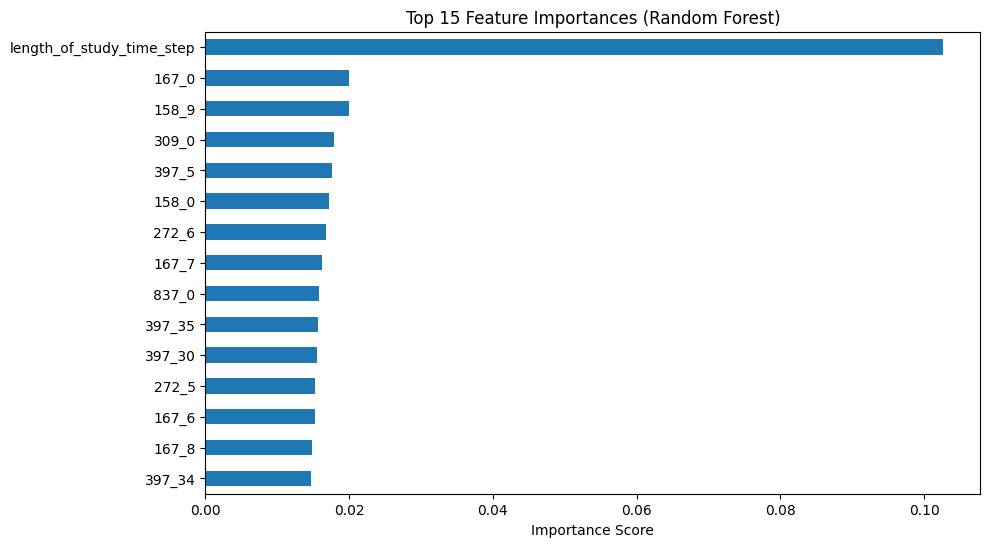


--- Point Biserial Correlation with in_study_repair ---
time_step                          : -0.06
171_0                              : 0.01
666_0                              : 0.03
837_0                              : 0.04
167_0                              : -0.01
167_1                              : -0.04
167_2                              : -0.04
167_3                              : -0.04
167_4                              : -0.03
167_5                              : 0.02
167_6                              : 0.03
167_7                              : 0.03
167_8                              : 0.03
167_9                              : 0.03
309_0                              : 0.01
272_0                              : -0.03
272_1                              : -0.04
272_2                              : -0.02
272_3                              : 0.01
272_4                              : -0.01
272_5                              : 0.01
272_6                              : 0.03
272_7    

In [ ]:
# --- Step 1: Handle Missing/Incomplete Columns ---
# Drop columns with too many missing values
missing_threshold = 5000
df = df.drop(columns=df.columns[df.isnull().sum() > missing_threshold])
# Fill missing with mean (can be risky if too sparse, comment-in reccomended)
df = df.fillna(df.mean(numeric_only=True))


# --- Step 2: Encode Categorical Features (if any) ---
from sklearn.preprocessing import LabelEncoder
# Automatically detect non-numeric columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Apply label encoding to each (works if low cardinality)
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


# --- Step 3: Define Target ---
y = df['in_study_repair']  # For classification
drop_cols = ['in_study_repair', 'tte', 'vehicle_id', 'timestamp']
available_cols = [col for col in drop_cols if col in df.columns]
X = df.drop(columns=available_cols)


# --- Step 4: Train/Test Split + Scaling ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale data use StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --- Step 5:  Feature Importance (for Classification) ---
from sklearn.ensemble import RandomForestClassifier
# Run RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
import pandas as pd
import matplotlib.pyplot as plt
# Define important feature in series
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)
print("\n--- Top 15 Features (Random Forest Importance) ---")
print(top_features)
# Plot
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


# --- Extra: Point-Biserial Correlation (Only Classification) ---
from scipy.stats import pointbiserialr
print("\n--- Point Biserial Correlation with in_study_repair ---")
for col in X.columns:
    corr, _ = pointbiserialr(X[col], y)
    print(f"{col:35}: {corr:.2f}")


# --- Optional: Only Regression (predicting tte) ---
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# # Finetuning Regressor with GradientBoostingRegressor
# model = GradientBoostingRegressor()
# model.fit(X_train_scaled, y_train)
# preds = model.predict(X_test_scaled)
# print("RMSE:", mean_squared_error(y_test, preds, squared=False))
# print("R2 Score:", r2_score(y_test, preds))
